In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets as sd
import sklearn.model_selection as ms
import scipy.linalg as sl
import numpy as np
import PIL
import cv2 as cv
np.set_printoptions(linewidth=120)

# Load MNIST data
Each image is represented by a 28 by 28 array of unsigned ints (0-255)

In [77]:
mnist = sd.fetch_mldata("MNIST original")
data, target = mnist.data, mnist.target


split data in to training set (60,000 observations) and testing set (10,000)

In [5]:
data_train, data_test, target_train, target_test = ms.train_test_split(data, target, train_size=60000, 
                                                                       test_size=10000, stratify=target)

## Display a few sample digits

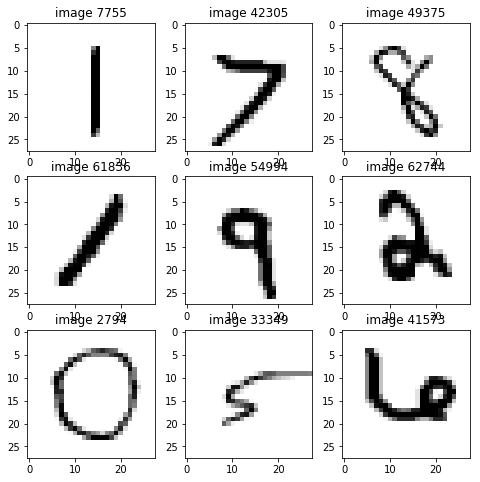

In [101]:
fig, axes = plt.subplots(3, 3, figsize=(8,8))
sample_images = [ 7755, 42305, 49375, 61836, 54994, 62744, 2794, 33349, 41573 ]
for i in range(3):
    for j in range(3):
        index = sample_images[i*3 + j]
        img = data[index].reshape(28, 28)
        ax = axes[i][j]
        ax.imshow(img, cmap=plt.cm.gray_r)
        ax.set_title('image {}'.format(index))
        

## Test a simple model
We'll use a gradient descent classifier here because of its speed, eventhough there are models that perform better for classification.

In [114]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

In [115]:
clf.fit(data_train, target_train)

/anaconda3/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [116]:
clf.score(data_test, target_test)

0.8862

In [117]:
clf.score(data_train, target_train)

0.8971666666666667

# Preprocessing
## Deskew image
Looking through the training data, we see that many images are slanted in one direction.
We use opencv to deskew these images based on their moments (https://en.wikipedia.org/wiki/Image_moment).

In [189]:
def deskew_image(img):
    """
    Deskew image based on moments
    
    Implementation based on: https://docs.opencv.org/3.4.0/dd/d3b/tutorial_py_svm_opencv.html
    
    """
    img = img.copy()
    rows, cols = img.shape
    if rows != cols:
        raise ValueError("image must be square")
    size = rows
    
    m = cv.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img
    
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*size*skew], [0, 1, 0]])
    img = cv.warpAffine(img, M, (size, size), 
                        flags=cv.WARP_INVERSE_MAP|cv.INTER_LINEAR)
    return img

    

Now let's see sample images look after we "deskew" them

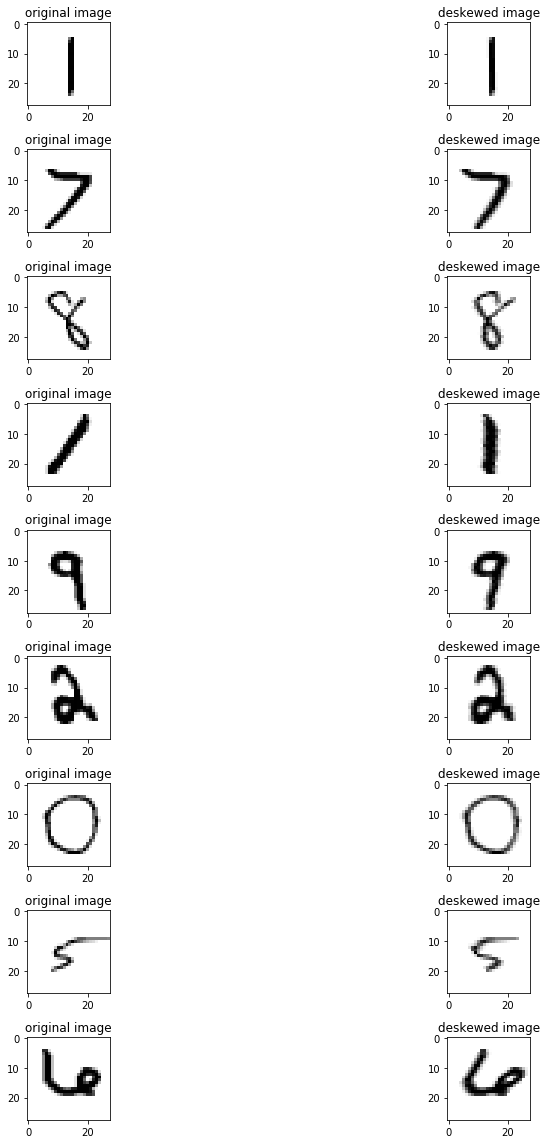

In [208]:
fig, axes = plt.subplots(9, 2, figsize=(16,16))
sample_images = [ 7755, 42305, 49375, 61836, 54994, 62744, 2794, 33349, 41573 ]
for i in range(9):
    index = sample_images[i]
    
    # plot original images
    ax = axes[i][0]
    img = data[index].reshape(28, 28)
    ax.imshow(img, cmap=plt.cm.gray_r)
    ax.set_title('original image')
    
    # now after dewskewing
    ax = axes[i][1]
    img = deskew_image(img)
    ax.imshow(img, cmap=plt.cm.gray_r)
    ax.set_title('deskewed image')

fig.tight_layout()    

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [194]:
preprocessed_train = [ deskew_image(img.reshape(28,28)).reshape(-1) for img in data_train ]
preprocessed_train = scaler.fit_transform(preprocessed_train)
preprocessed_test =  [ deskew_image(img.reshape(28,28)).reshape(-1) for img in data_test ]
preprocessed_test = scaler.fit_transform(preprocessed_test)


In [196]:
clf.fit(preprocessed_train, target_train)
clf.score(preprocessed_train, target_train)
#clf.score(preprocessed_test, target_test)


/anaconda3/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.93955

In [129]:
predict_train = clf.predict(preprocessed_train)

In [157]:
errors_train = np.where(predict_train != target_train)[0]
len(errors_train)
print(target_train[errors_train[0]])
predict_train[errors_train[0]]

9.0


7.0

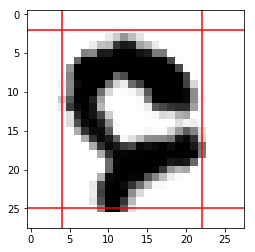

In [158]:
img = preprocessed_train[errors_train[0]].reshape(28, 28)
plot_bbox(img)

# Data augmentation

In [ ]:
import PIL

In [ ]:
sample = data_train[34222].reshape(28, 28)
img = PIL.Image.fromarray(sample)
plt.imshow(img)

In [ ]:
plt.imshow(sample)

In [ ]:
angle = determine_image_skew(sample)
angle

In [ ]:
angle

In [ ]:
plt.imshow(sample)


In [ ]:
plt.imshow(deskew_image(deskew_image(sample)))